In [1]:
# cat vs dog basic CNN



from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('G:\ML Datasets\DATA SETS\catsVSdog\cnnfirest',
                                                 target_size = (64, 64),
                                                 batch_size = 21,
                                                 class_mode = 'binary')
print(len(training_set))
test_set = test_datagen.flow_from_directory('G:\ML Datasets\DATA SETS\catsVSdog\cnnfirest',
                                            target_size = (64, 64),
                                            batch_size = 21,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch =15,
                         epochs = 12,
                         validation_data = test_set,    
                         validation_steps =7 )

classifier.save("modelcvd.h5")
print("Saved model to disk")

# Part 3 - Making new predictions






Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 310 images belonging to 2 classes.
15
Found 310 images belonging to 2 classes.

Epoch 1/12
15/15 [==============================] - 33s 2s/step - loss: 0.7186 - accuracy: 0.5032 - val_loss: 0.7296 - val_accuracy: 0.5306
Epoch 2/12
15/15 [==============================] - 14s 920ms/step - loss: 0.6909 - accuracy: 0.5484 - val_loss: 0.6989 - val_accuracy: 0.5782
Epoch 3/12
15/15 [==============================] - 15s 970ms/step - loss: 0.6831 - accuracy: 0.5484 - val_loss: 0.6576 - val_accuracy: 0.5634
Epoch 4/12
15/15 [==============================] - 14s 952ms/step - loss: 0.6708 - accuracy: 0.5871 - val_loss: 0.5652 - val_accuracy: 0.5850
Epoch 5/12
15/15 [==============================] - 15s 1s/step - loss: 0.6267 - accuracy: 0.6355 - val_loss: 0.5750 - val_accuracy: 0.7817
Epoch 6/12
15/15 [==============================] - 16s 1s/step - loss: 0.5720 - accuracy: 0.6935 - val_loss: 

In [8]:
from keras.models import Sequential
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

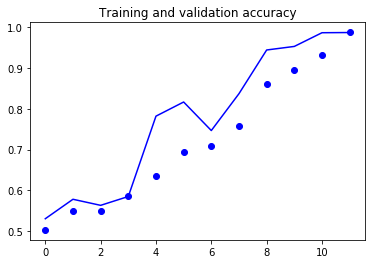

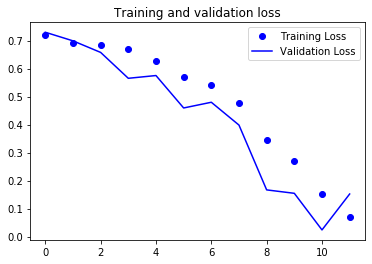

In [5]:
import matplotlib.pyplot as plt
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [7]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
model = load_model('modelcvd.h5')

test_image = image.load_img('G:/ML Datasets/DATA SETS/catsVSdog/cnnfirest/cat/cat.100.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
